In [2]:
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")


In [3]:
import numpy as np
from scipy.signal import cwt
from scipy.signal import ricker as wavelet_ricker
#from scipy.signal import 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [4]:
import src.uilc as uilc

In [5]:
#Optical system setting
cm = 1E-2
s = 30
W = 0.09
H = 0.03

In [14]:
n_nnls = 1500
x_line = np.linspace(-W/2, W/2, n_nnls, endpoint=True)
nnls_rho1, nnls_position1, nnls_F = uilc.disop.solve_system(s, W, H, n_nnls = n_nnls, method="nnls", mean=False)
nnls_rho1 = (nnls_rho1.shape[0]/(W*nnls_rho1.sum())) * nnls_rho1

width = np.arange(5 , 100, 0.5)
cwtmatr = cwt(nnls_rho1, wavelet_ricker, width)


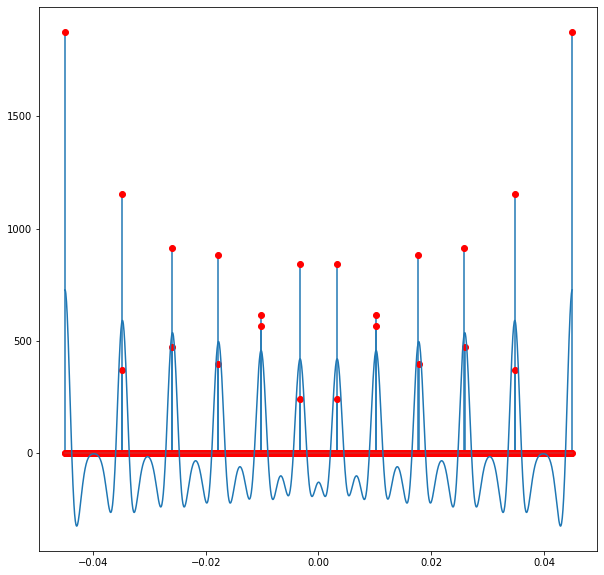

In [18]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
marker2, stemlines2, baseline2 = ax.stem(nnls_position1, nnls_rho1, label="1000")
marker2.set_color("r")
ax.plot(nnls_position1, 2*cwtmatr[30])
plt.show()

In [16]:

cwtmatr2 = cwt(1 * np.ones(len(nnls_rho1)), wavelet_ricker, width)

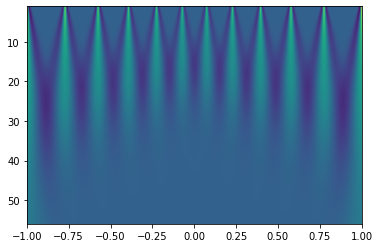

In [17]:
plt.imshow(cwtmatr, extent=[-1, 1, 56, 1], cmap='viridis', aspect='auto',
           vmax=abs(cwtmatr).max())

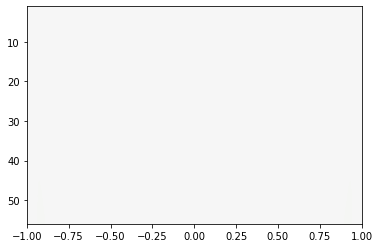

In [14]:
plt.imshow(cwtmatr2, extent=[-1, 1, 56, 1], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

In [15]:
xline = np.linspace(-W/2, W/2, n_nnls)
yline = width


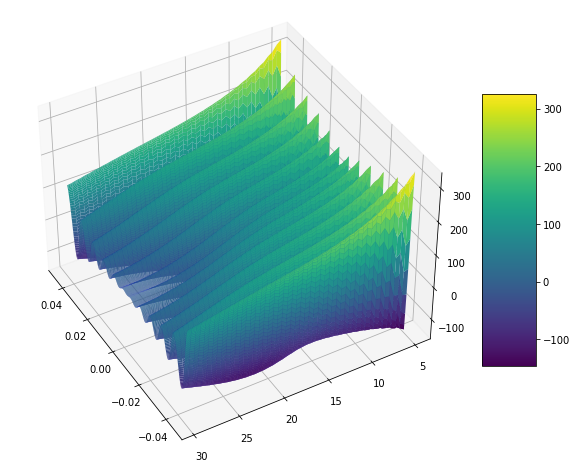

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(xline, yline)
sur = ax.plot_surface(X, Y, cwtmatr, rstride=1, cstride=1,
                cmap='viridis', edgecolor='b', linewidth=0.01)
fig.colorbar(sur, shrink=0.5, aspect=5)

ax.view_init(40, 150)
plt.show()

In [108]:
X, Y = np.meshgrid(X, Y)

[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45
 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95]


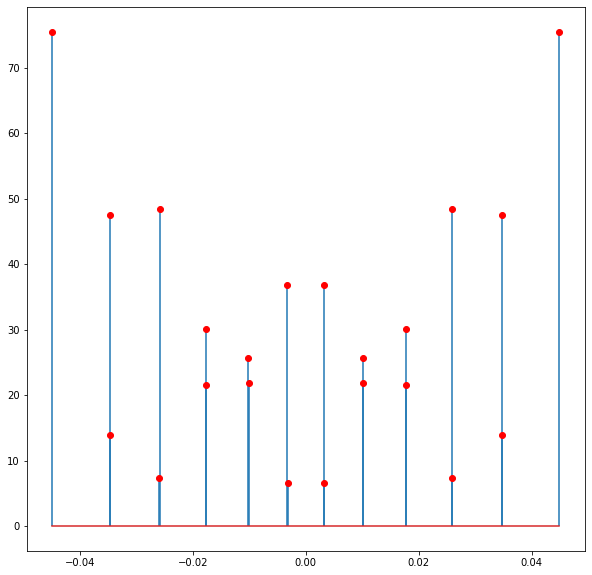

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
marker2, stemlines2, baseline2 = ax.stem(nnls_position1, cwtmatr[0], label="1000")
marker2.set_color("r")
plt.show()